In [9]:
import pandas as pd
import numpy as np
import datetime
# pd.core.common.is_list_like = pd.api.types.is_list_like
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import os

In [10]:
import pandas_datareader as pdr

In [12]:
import pandas as pd

df = pd.read_csv (r'C:\Users\Hersh\Desktop\Quantisti Folder\DMP\DMP01 Assignment\MSFT.csv')   #read the csv file (put 'r' before the path string to address any special characters, such as '\'). Don't forget to put the file name at the end of the path + ".csv"
print (df)


            Date        Open        High         Low       Close   Adj Close  \
0     2009-12-15   29.889999   30.209999   29.879999   30.020000   23.628725   
1     2009-12-16   30.070000   30.410000   30.040001   30.100000   23.691690   
2     2009-12-17   29.950001   29.959999   29.570000   29.600000   23.298141   
3     2009-12-18   29.840000   30.450001   29.799999   30.360001   23.896334   
4     2009-12-21   30.400000   30.840000   30.370001   30.520000   24.022272   
5     2009-12-22   30.600000   30.930000   30.540001   30.820000   24.258406   
6     2009-12-23   30.709999   30.950001   30.690001   30.920000   24.337109   
7     2009-12-24   30.879999   31.000000   30.760000   31.000000   24.400082   
8     2009-12-28   31.000000   31.180000   30.889999   31.170000   24.533884   
9     2009-12-29   31.350000   31.500000   31.230000   31.389999   24.707052   
10    2009-12-30   31.150000   31.290001   30.799999   30.959999   24.368599   
11    2009-12-31   30.980000   30.990000

In [14]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-12-15,29.889999,30.209999,29.879999,30.020000,23.628725,49473200
1,2009-12-16,30.070000,30.410000,30.040001,30.100000,23.691690,55737800
2,2009-12-17,29.950001,29.959999,29.570000,29.600000,23.298141,43691200
3,2009-12-18,29.840000,30.450001,29.799999,30.360001,23.896334,94118000
4,2009-12-21,30.400000,30.840000,30.370001,30.520000,24.022272,40129100


## Q1: We'd created a list called 'wealth' in the modified Faber strategy. We also computed maWealth. Use the method cumprod() from NumPy instead to get the same output. (Hint: You don't need to create maWealth). (5 Marks)

In [15]:
df1 = df.copy()
df2 = df.copy()

In [28]:
buyPrice = 0
sellPrice = 0
cash = 1
stock = 0
sma = 200
ChangeValue= 1.0

ma = np.round(df1['Adj Close'].rolling(window=sma, center=False).mean(), 2)
n_days = len(df1['Adj Close'])

In [42]:
closePrices = df1['Adj Close']

buy_data = []
sell_data = []

trade_price = []


for d in range(sma-1, n_days):
    # Buy if stock price > MA & if not bought yet
    if closePrices[d] > ma[d] and cash == 1:
        buyPrice = closePrices[d + 1]
        buy_data.append(buyPrice)
        trade_price.append(buyPrice)
        cash = 0
        stock = 1

    # Sell if stock price < MA and if you have a stock to sell

    if closePrices[d] < ma[d] and stock == 1:
        sellPrice = closePrices[d + 1]
        sell_data.append(sellPrice)
        trade_price.append(sellPrice)
        cash = 1
        stock = 0

    ChangeValue = 1 * (sellPrice / buyPrice)

In [43]:
pnl=ChangeValue.cumprod()

In [44]:
pnl

array([0.98619647])

In [45]:
wealth.append(pnl)

In [46]:
len(wealth)

3

In [47]:
type(wealth)

list

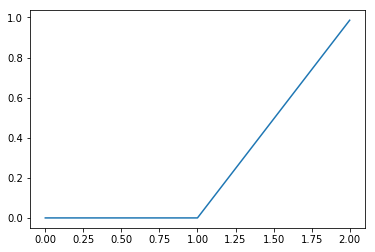

In [48]:
plt.plot(wealth)

Q2: The modified Faber's strategy has been implemented using 'for loop'. Implement the same strategy using dataframe.apply() method. (5 Marks)